<a href="https://colab.research.google.com/github/TrickyTroll/ML-intro/blob/Tricky/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Following a tutorial to learn about classification

https://www.pyimagesearch.com/2020/08/24/ocr-handwriting-recognition-with-opencv-keras-and-tensorflow/

https://www.pyimagesearch.com/2020/08/17/ocr-with-keras-tensorflow-and-deep-learning/

In [6]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## Loading the minst data

In [7]:
((train_data, train_labels), (test_data, test_labels)) = mnist.load_data()
num_data = np.vstack([train_data, test_data])
num_labels = np.hstack([train_labels, test_labels])

In [8]:
train_data.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
test_data.shape

(10000, 28, 28)

## Preprocessing

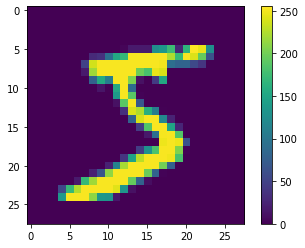

In [12]:
plt.figure()
plt.imshow(train_data[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_labels[0]

5

In [14]:
train_images = train_data / 255.0
test_images = test_data / 255.0

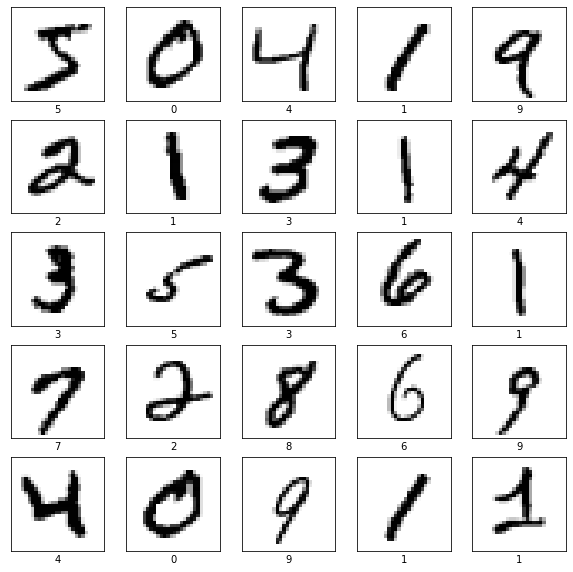

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2599 - accuracy: 0.9258
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1170 - accuracy: 0.9660
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0822 - accuracy: 0.9754
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0618 - accuracy: 0.9808
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0471 - accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0385 - accuracy: 0.9878
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0299 - accuracy: 0.9905
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0249 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0202 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0866 - accuracy: 0.9776

Test accuracy: 0.9775999784469604


In [20]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [21]:
predictions = probability_model.predict(test_images)

In [22]:
predictions[0]

array([1.9661710e-10, 4.7377735e-12, 9.9168929e-08, 2.0055137e-05,
       2.8328763e-16, 6.7276744e-12, 2.6945398e-18, 9.9997985e-01,
       1.1611788e-08, 2.4384295e-08], dtype=float32)

In [23]:
np.argmax(predictions[0])

7

In [24]:
test_labels[0]

7

In [25]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

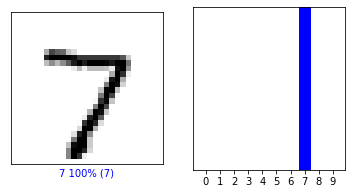

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

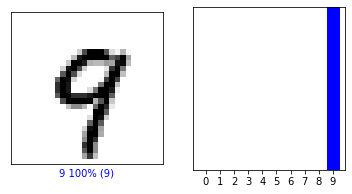

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

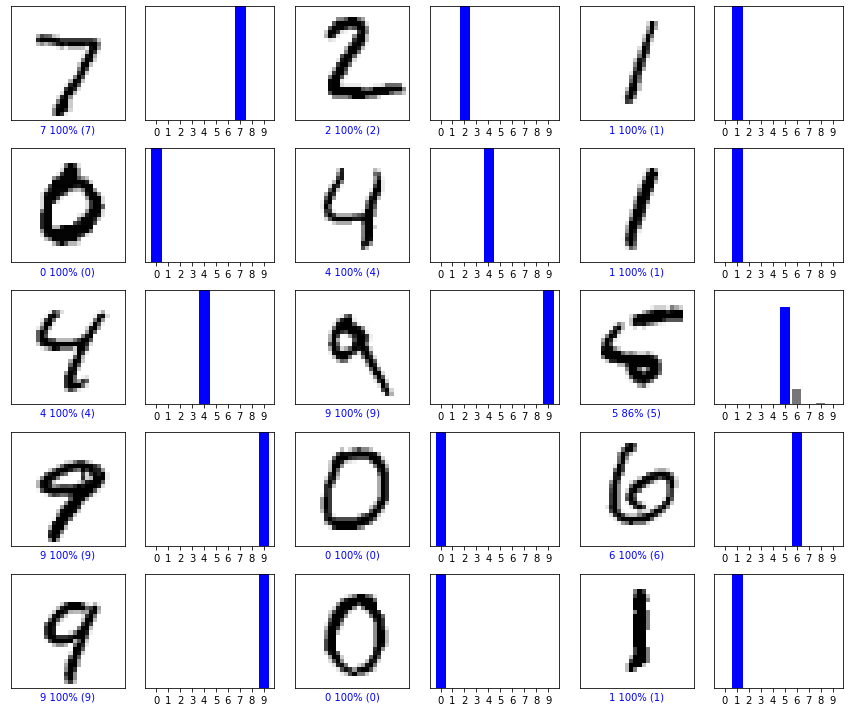

In [28]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [29]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [30]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [31]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.02740568e-11 1.02716516e-10 1.00000000e+00 2.60540700e-10
  7.93700804e-24 1.18511747e-15 2.46190698e-15 4.18569623e-19
  2.64622907e-10 5.62795185e-14]]


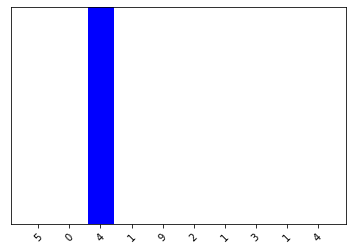

In [32]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), train_labels, rotation=45) #The labels are wrong

In [33]:
np.argmax(predictions_single[0])


2

## Testing it on my own images